[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mjnik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<IPython.core.display.Javascript object>


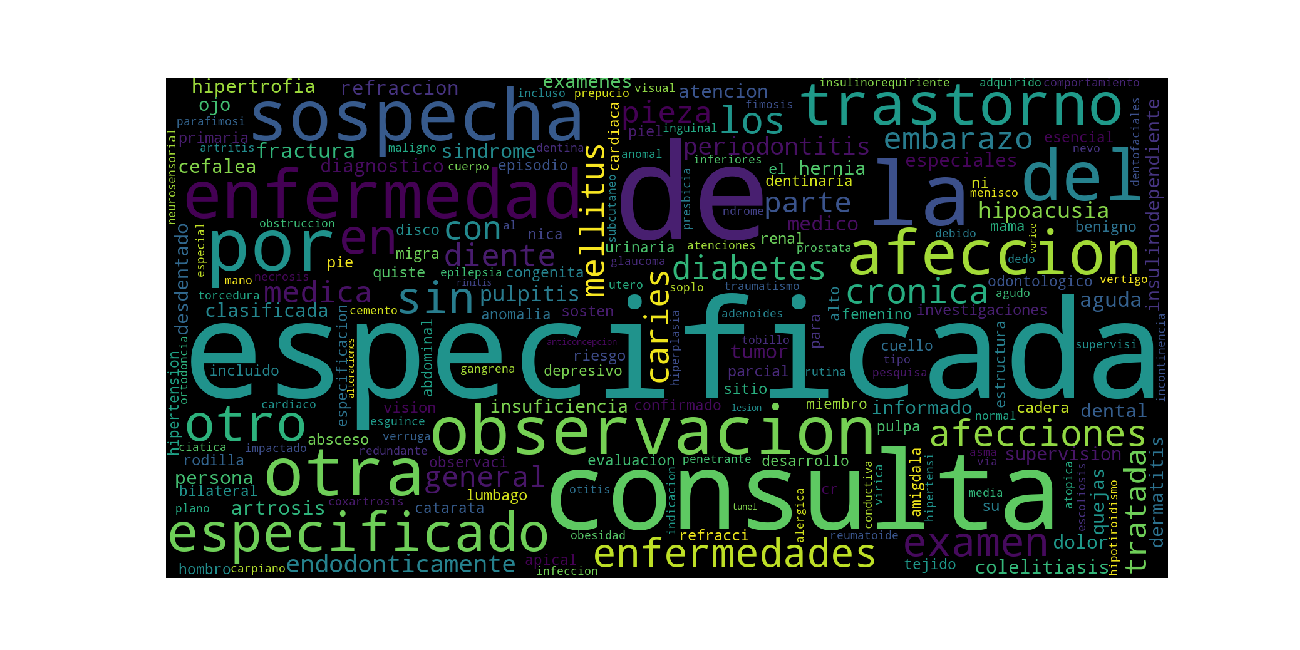

Stemming: ['enfermera', 'enfermo', 'especificada', 'consulta']


In [70]:
# Pregunta 1: Limpieza de la base de datos

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk # librería para tokenizar el texto.
from nltk import stem

excel_file = 'aysen_exercice.xlsx'
datos = pd.read_excel(excel_file)

# Descargamos las stopwords
# Estas nos sirven para descartar aquellas que no aportan al texto 
#nltk.download('stopwords')
#nltk.download('punkt')
nltk.download('wordnet') 
stopwords = nltk.corpus.stopwords.words('spanish')
set(stopwords)


description = datos.loc[:,"SOSPECHA_DIAG"].str.cat(sep=',')

# Contamos las derivaciones para cada especialidad para identificar las que tienen mas de 10000 filas
D10K = datos.loc[:,"PRESTA_EST"].value_counts()[:10]

D10K.head(5)


# cambiamos a minusculas
cambiando_a_minusculas = datos['SOSPECHA_DIAG'].str.lower()


# Buscamos las prestaciones de acuerdo a traumatologia
traumatologia = datos[datos['PRESTA_EST'].str.contains("TRAUMATOLOGIA")]

# eliminamos los caracteres non-ascii y tokenizamos las palabas
cambiando_a_minusculas = cambiando_a_minusculas.str.replace(r"[^A-Za-z0-9_]"," ")

cambiando_a_minusculas

#Lista de stopwords y eliminamos las palabras.
lista_texto_filtrada = [word for word in cambiando_a_minusculas if word not in stopwords]
lista_texto_filtrada

# Filtramos el texto y graficamos las palabras más usadas
lista_texto_filtrada = ' '.join(lista_texto_filtrada)
wordcloud_filtered = WordCloud(width=1600, height=800, collocations=False).generate(lista_texto_filtrada)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_filtered)
plt.axis("off")
plt.show()

# Stemming
porter = stem.porter.PorterStemmer()


# Stemming: usamos heuristicas para cortar la uñtima parte del lenguaje
lista_palabras = ['enfermera', 'enfermo', 'especificada', 'consulta']
stem_list = [porter.stem(word) for word in lista_palabras]
print("Stemming:", stem_list)




In [72]:
# Pregunta 2: Analisis no-supervisado y visualizacion
D10K

TRAUMATOLOGIA           24004
OFTALMOLOGIA            21482
CIRUGIA ADULTO          17321
OTORRINOLARINGOLOGIA    13663
NEUROLOGIA              12316
MEDICINA INTERNA        11408
GINECOLOGIA             10871
ENDODONCIA              10225
DERMATOLOGIA             8949
PEDIATRIA                8130
Name: PRESTA_EST, dtype: int64

<IPython.core.display.Javascript object>


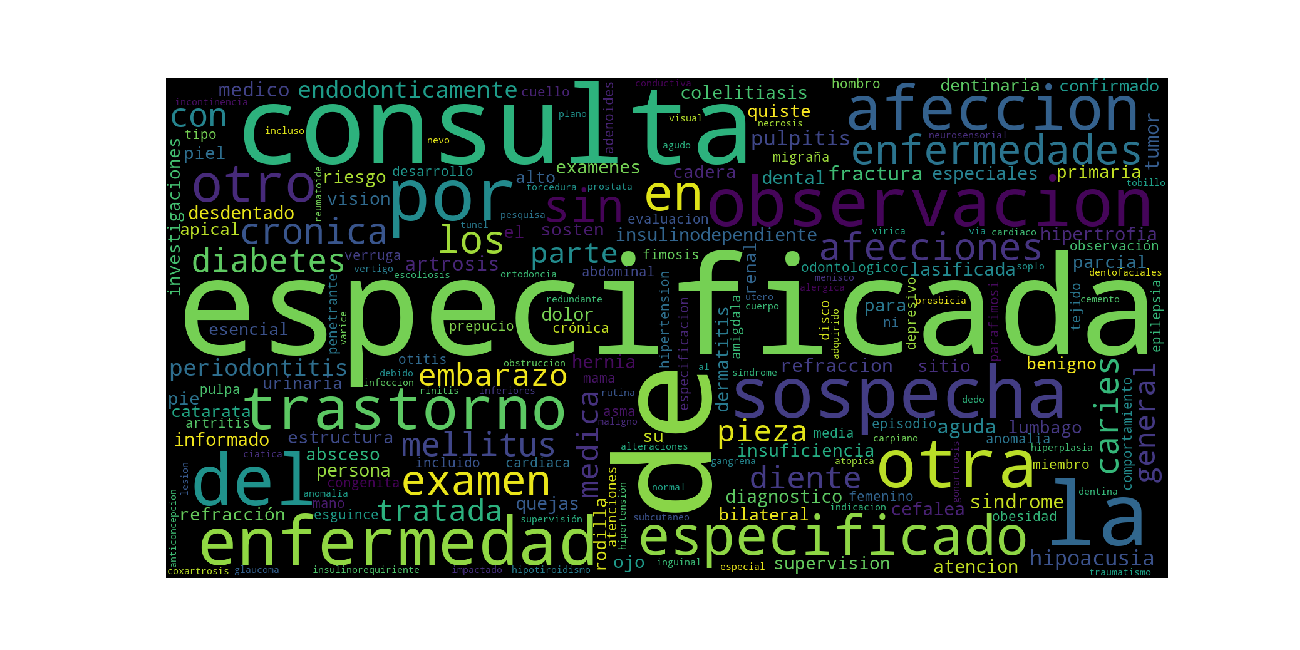

In [81]:
# Visualizacion de las palabras mas comunes para cada categoria

all_text = ' '.join(datos['SOSPECHA_DIAG']).lower()

wordcloud_all = WordCloud(width=1600, height=800, collocations=False).generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all)
plt.axis("off")
plt.show()

In [83]:
# Calcular las matrices TF-IDF

import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


#  Buscamos las categorias 
# TRAUMATOLOGIA           24004
# OFTALMOLOGIA            21482
# CIRUGIA ADULTO          17321
# OTORRINOLARINGOLOGIA    13663
# NEUROLOGIA              12316
# MEDICINA INTERNA        11408
# GINECOLOGIA             10871
# ENDODONCIA              10225
# DERMATOLOGIA             8949
# PEDIATRIA                8130

categories = ['TRAUMATOLOGIA', 'OFTALMOLOGIA', 'CIRUGIA ADULTO', 'OTORRINOLARINGOLOGIA', 'NEUROLOGIA', 
              'MEDICINA INTERNA', 'GINECOLOGIA', 'ENDODONCIA', 'DERMATOLOGIA','PEDIATRIA' ]
# Elimina llos
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

#mirar los datos
newsgroups_train.filenames.shape, newsgroups_train.target.shape

#%%

print("\n#############".join(newsgroups_train.data[:3]))

#%%

#calcular tf-idf
vectorizer_tfidf = TfidfVectorizer(stopwords='spanish')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)
vectors_tfidf



ValueError: 'TRAUMATOLOGIA' is not in list

<IPython.core.display.Javascript object>


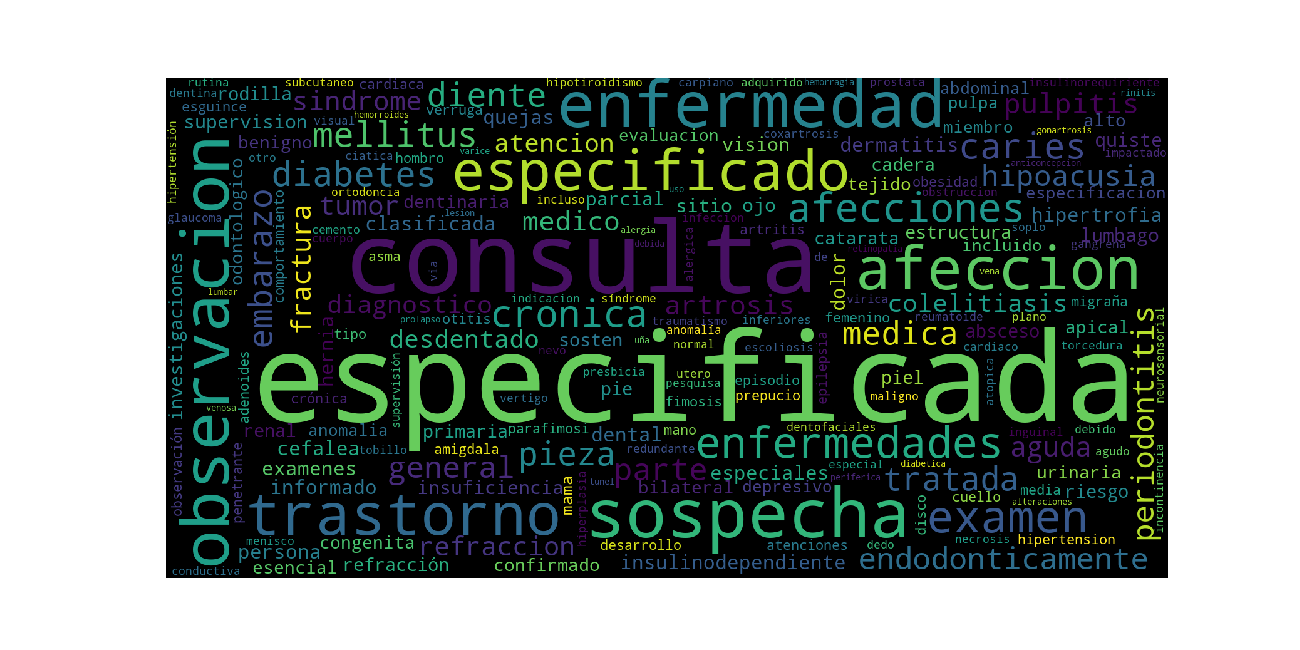

Primeras 0 palabras listas
Primeras 100 palabras listas
Primeras 200 palabras listas
Primeras 300 palabras listas
Primeras 400 palabras listas
Primeras 500 palabras listas
Primeras 600 palabras listas
Primeras 700 palabras listas
Primeras 800 palabras listas
Primeras 900 palabras listas
Primeras 1000 palabras listas
Primeras 1100 palabras listas
Primeras 1200 palabras listas
Primeras 1300 palabras listas
Primeras 1400 palabras listas
Primeras 1500 palabras listas
Primeras 1600 palabras listas
Primeras 1700 palabras listas
Primeras 1800 palabras listas
Primeras 1900 palabras listas
Primeras 2000 palabras listas
Primeras 2100 palabras listas
Primeras 2200 palabras listas
Primeras 2300 palabras listas
Primeras 2400 palabras listas
Primeras 2500 palabras listas
Primeras 2600 palabras listas
Primeras 2700 palabras listas
Primeras 2800 palabras listas
Primeras 2900 palabras listas
Primeras 3000 palabras listas
Primeras 3100 palabras listas
Primeras 3200 palabras listas
Primeras 3300 palabras

<IPython.core.display.Javascript object>


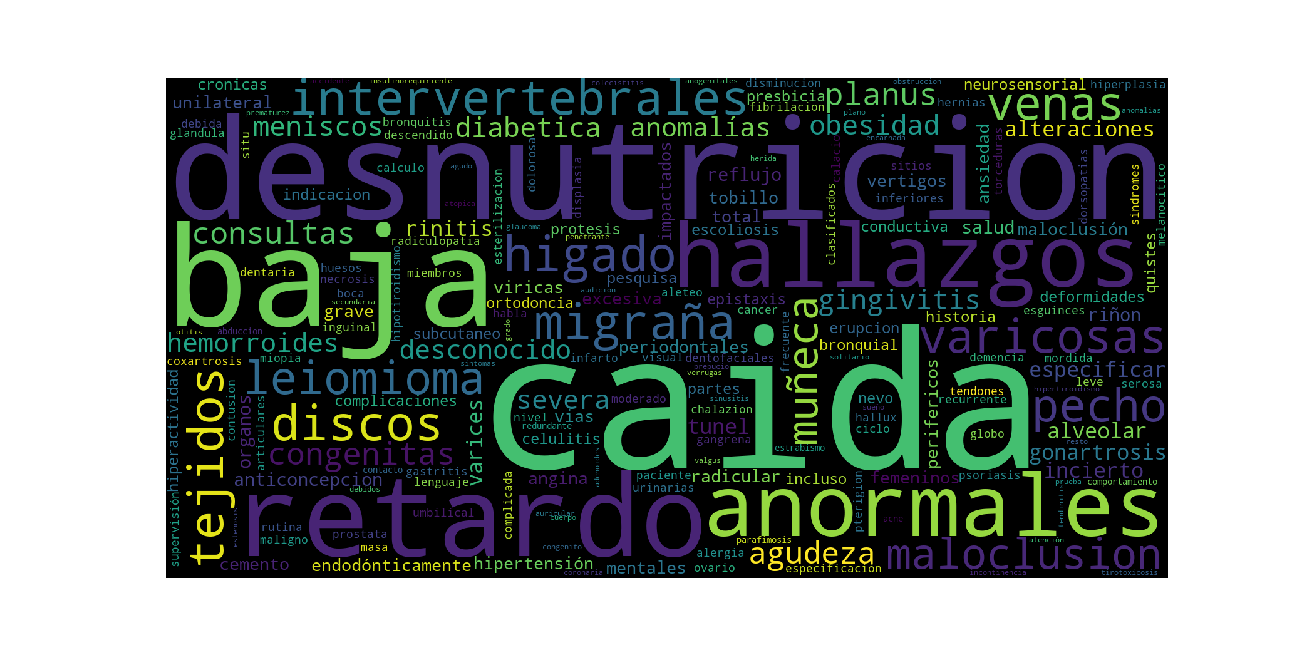

In [85]:
all_text_list = all_text.split(' ')
filtered_text_list = [word for word in all_text_list if word not in stopwords_spanish]
filtered_text_list

#%%

filtered_text = ' '.join(filtered_text_list)
wordcloud_filtered = WordCloud(width=1600, height=800, collocations=False).generate(filtered_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_filtered)
plt.axis("off")
plt.show()

#%% md

### TF-IDF

#%%

def filter_words(row):
    '''Tokeniza una fila, elimina los caracteres no alfanuméricos 
    y retorna sólo aquellas palabras que no son stopwords
    '''
    words = nltk.word_tokenize(row.lower())
    f_words = [word for word in words if word.isalpha() and word not in stopwords_spanish]
    return ' '.join(f_words)

row = "LA... CASA, (EN) EL áRbOL"
filter_words(row)

#%%

df_no_stopwords = datos['SOSPECHA_DIAG'].apply(filter_words)
len(df_no_stopwords)

#%%

df_no_stopwords.head(10)

#%%

words = nltk.word_tokenize(' '.join(df_no_stopwords))
words[:20], len(words)

#%%

unique_words = set(words)
len(unique_words)

#%%

def calc_idf(word, corpus):
    N = len(corpus)
    counter = 0
    for row in corpus:
        if word in row:
            counter += 1
    return np.log(N/(1+counter))

#%%

dict_idf = {}
for i, word in enumerate(unique_words):
    if i%100 == 0:
        print('Primeras', i, 'palabras listas')
    dict_idf[word] = calc_idf(word, df_no_stopwords)

#%%

sorted_idf = {k: v for k, v in sorted(dict_idf.items(), reverse=True, key=lambda item: item[1])}
sorted_idf

#%%

import collections
all_rows_merged = ' '.join(df_no_stopwords)
all_tokens = nltk.word_tokenize(all_rows_merged)
all_tokens[:20], len(all_tokens) 
dict_joint_tf = collections.Counter()
dict_joint_tf.update(all_tokens)
dict_joint_tf

#%%

sorted_tf = {k: v for k, v in sorted(dict_joint_tf.items(), reverse=True, key=lambda item: item[1])}
sorted_tf

#%%

tf_idf = {}
for word in dict_idf:
    tf_idf[word] = dict_idf[word]*np.log(1 + dict_joint_tf[word])

sorted_tf_idf = {k: v for k, v in sorted(tf_idf.items(), reverse=True, key=lambda item: item[1])}
sorted_tf_idf

#%%

wordcloud_tfidf = WordCloud(width=1600, height=800).generate_from_frequencies(tf_idf)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_tfidf)
plt.axis("off")
plt.show()

#%%

In [61]:
%matplotlib notebook
import nltk

nltk.download('stopwords')
nltk.download('punkt')
stopwords_spanish = nltk.corpus.stopwords.words('spanish')

sorted(stopwords_spanish)

#%%

import spacy
nlp = spacy.load("en_core_web_sm")
sorted(nlp.Defaults.stop_words)


#%% md

# Lematización y stemming

#%%

from nltk import stem
nltk.download('wordnet') 

wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

#%%

word_list = ['feet', 'foot', 'foots', 'footing']
stem_list = [porter.stem(word) for word in word_list]
lemm_list =  [wnl.lemmatize(word) for word in word_list]
lemm_list_pos = [wnl.lemmatize(word, pos='v') for word in word_list] # Lematizamos indicando que la palabra es un verbo
print("Stemming:", stem_list)
print("Lematización:", lemm_list)
print("Lematización con POS:", lemm_list_pos)

#%%

word_list = ['fly', 'flies', 'flying']
stem_list = [porter.stem(word) for word in word_list]
lemm_list =  [wnl.lemmatize(word) for word in word_list]
lemm_list_pos = [wnl.lemmatize(word, pos='v') for word in word_list] # Lematizamos indicando que la palabra es un verbo
print("Stemming:", stem_list)
print("Lematización:", lemm_list)
print("Lematización con POS:", lemm_list_pos)

#%%

word_list = ['organize', 'organizes', 'organizing']
stem_list = [porter.stem(word) for word in word_list]
lemm_list =  [wnl.lemmatize(word) for word in word_list]
lemm_list_pos = [wnl.lemmatize(word, pos='v') for word in word_list] # Lematizamos indicando que la palabra es un verbo
print("Stemming:", stem_list)
print("Lematización:", lemm_list)
print("Lematización con POS:", lemm_list_pos)

#%%

word_list = ['universe', 'university']
stem_list = [porter.stem(word) for word in word_list]
lemm_list =  [wnl.lemmatize(word) for word in word_list]
lemm_list_pos = [wnl.lemmatize(word, pos='v') for word in word_list] # Lematizamos indicando que la palabra es un verbo
print("Stemming:", stem_list)
print("Lematización:", lemm_list)
print("Lematización con POS:", lemm_list_pos)

#%% md

## En español

#%% md

### Stemming

#%%

nltk.download('wordnet') 
spanish_stem = nltk.SnowballStemmer('spanish')
words = ['jugar', 'juego', 'jugada', 'jugador']
stem_list = [spanish_stem.stem(word) for word in words]
stem_list

#%%

#bajar con el comando 'spacy download es_core_news_sm'
nlp_spanish = spacy.load("es_core_news_sm")
for token in nlp_spanish(' '.join(words)):
    print(token.lemma_)

#%% md

# TF-IDF

#%%

import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#%%

categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)
#mirar los datos
newsgroups_train.filenames.shape, newsgroups_train.target.shape

#%%

print("\n#############".join(newsgroups_train.data[:3]))

#%%

#calcular tf-idf
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)
vectors_tfidf

#%% md

## Ejemplo de wordcloud

#%%

from wordcloud import WordCloud
description = "Un texto de prueba para mi primer wordcloud en el todo el mundo, espero que logre repetir algunas palabras"
wordcloud = WordCloud(width=1600, height=800).generate(description)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


#%% md

## Ejercicio

#%% md

### Directamente

#%%

import pandas as pd
filepath = 'aysen_exercice.csv'
df = pd.read_csv(filepath, sep=';')
df

#%%

all_text = ' '.join(df['SOSPECHA_DIAG']).lower()
# collocations=False, para evitar bigramas (https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html)
wordcloud_all = WordCloud(width=1600, height=800, collocations=False).generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_all)
plt.axis("off")
plt.show()

#%% md

### Filtrado de stopwords

#%%

all_text_list = all_text.split(' ')
filtered_text_list = [word for word in all_text_list if word not in stopwords_spanish]
filtered_text_list

#%%

filtered_text = ' '.join(filtered_text_list)
wordcloud_filtered = WordCloud(width=1600, height=800, collocations=False).generate(filtered_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_filtered)
plt.axis("off")
plt.show()

#%% md

### TF-IDF

#%%

def filter_words(row):
    '''Tokeniza una fila, elimina los caracteres no alfanuméricos 
    y retorna sólo aquellas palabras que no son stopwords
    '''
    words = nltk.word_tokenize(row.lower())
    f_words = [word for word in words if word.isalpha() and word not in stopwords_spanish]
    return ' '.join(f_words)

row = "LA... CASA, (EN) EL áRbOL"
filter_words(row)

#%%

df_no_stopwords = df['SOSPECHA_DIAG'].apply(filter_words)
len(df_no_stopwords)

#%%

df_no_stopwords.head(10)

#%%

words = nltk.word_tokenize(' '.join(df_no_stopwords))
words[:20], len(words)

#%%

unique_words = set(words)
len(unique_words)

#%%

def calc_idf(word, corpus):
    N = len(corpus)
    counter = 0
    for row in corpus:
        if word in row:
            counter += 1
    return np.log(N/(1+counter))

#%%

dict_idf = {}
for i, word in enumerate(unique_words):
    if i%100 == 0:
        print('Primeras', i, 'palabras listas')
    dict_idf[word] = calc_idf(word, df_no_stopwords)

#%%

sorted_idf = {k: v for k, v in sorted(dict_idf.items(), reverse=True, key=lambda item: item[1])}
sorted_idf

#%%

import collections
all_rows_merged = ' '.join(df_no_stopwords)
all_tokens = nltk.word_tokenize(all_rows_merged)
all_tokens[:20], len(all_tokens) 
dict_joint_tf = collections.Counter()
dict_joint_tf.update(all_tokens)
dict_joint_tf

#%%

sorted_tf = {k: v for k, v in sorted(dict_joint_tf.items(), reverse=True, key=lambda item: item[1])}
sorted_tf

#%%

tf_idf = {}
for word in dict_idf:
    tf_idf[word] = dict_idf[word]*np.log(1 + dict_joint_tf[word])

sorted_tf_idf = {k: v for k, v in sorted(tf_idf.items(), reverse=True, key=lambda item: item[1])}
sorted_tf_idf

#%%

wordcloud_tfidf = WordCloud(width=1600, height=800).generate_from_frequencies(tf_idf)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_tfidf)
plt.axis("off")
plt.show()

#%%

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mjnik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mjnik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ValueError: spacy.syntax.nn_parser.Parser size changed, may indicate binary incompatibility. Expected 72 from C header, got 64 from PyObject